In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification, load_digits, load_diabetes
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# plt.rc('text', usetex=True)
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)





### [Support Vector Machine](https://link.springer.com/content/pdf/10.1007/bf00994018.pdf)
<!-- maximum  margin classifier -->
From Logistic Regression to SVM => from statistical formulation (MLE) to the geometric formulation



Objective: a widest lines that can separate all the training examples of each class  
<!-- the decision boundary that has the largest distance to the nearest training data points of any class -->
<!-- * Assumption: the wider the margin, the lower the generalization error of the classifier -->
* maximize the margin via flat, affine hyperplane in high dimensional space

$$\max \left(\bar{x}_{+}-\bar{x}_{-}\right) \cdot \frac{\omega}{\|\omega\|}$$ 

How to calculate the margin?
$$\bar{\omega} \cdot \bar{x}_{+}+b \geq 1$$

$$\bar{\omega} \cdot \bar{x}_{-}+b \leq -1$$

* $y_i=1$ for positive examples and $y_i=-1$ for negative examples
  $$\Rightarrow y_i\left(w^T x_i+b\right) \geq 1 \quad \forall i$$
<!-- <center><img src="pics/svm3.png" width="500"></center> -->
* $\bar{x}_{+}=1-b$ and $\bar{x}_{-}=1+b$ 
$$\max \frac{2}{||w||}$$


* Final form of objective can be defined as a quadratic programming problem:
    
    $$\min \frac{1}{2}\|w\|^2 \text { subject to } y_i\left(w^T x_i+b\right) \geq 1 $$

  
         
    $$w=\sum_i \alpha_i y_i x_i$$



<!-- * Compared to the Decision Boundary for Logistic Regression:
    + only one v.s. indefinite
    + is only determined by the support vectors v.s. all the data points
    <center><img src="pics/svm1.png" width="500"></center> -->



**How to find the extermum of a function with constraints?**
<!-- we have to use lagrangian multiplier? -->
$$\min \frac{1}{2}\|w\|^2 - \sum_i \alpha_i (y_i\left(w^T x_i+b\right) - 1) $$

<!-- Solutions: 1) gradient descent approach; 2)the Sequential Minimal Optimization (SMO) algorithm; 3) other quadratic programming solutions  -->

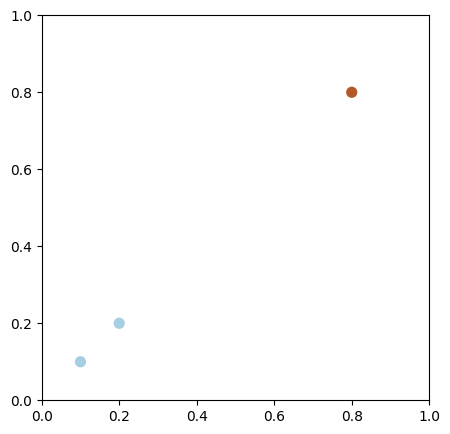

In [17]:

X = [[0.2, 0.2], [0.8, 0.8], ]
y = [0, 1]

X.append( [0.1, 0.1])
y.append(0)
# # generate a list of data points with values less than 0.2
# for i in range(10):
#     X.append(np.random.rand(2) * 0.2)
#     y.append(0)
# # generate a list of data points with values greater than 0.8
# for i in range(10):
#     X.append(np.random.rand(2) * 0.2 + 0.8)
#     y.append(1)



# fit the model
clf = svm.SVC( kernel = 'linear')
clf.fit(X, y)
plt.figure(figsize=(5, 5))
plt.scatter([x[0] for x in X], [x[1] for x in X], c=y, s=50, cmap=plt.cm.Paired)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

# # draw the decision boundary
# # Retrieve the weights (w) and intercept (b) from the trained SVM model
# w = clf.coef_[0]
# b = clf.intercept_[0]

# # Calculate the slope and intercept for the decision boundary
# slope = -w[0] / w[1]
# intercept = -b / w[1]
# print('slope: ', slope)
# print('intercept: ', intercept)

# plt.figure(figsize=(5, 5))
# plt.scatter([x[0] for x in X], [x[1] for x in X], c=y, s=50, cmap=plt.cm.Paired)
# plt.plot(np.linspace(0, 1), slope * np.linspace(0, 1) + intercept, 'k-')
# plt.xlim(0, 1)
# plt.ylim(0, 1)
# plt.show()

# print('support vectors: ', clf.support_vectors_)
# print('indices of support vectors: ', clf.support_)
# print('number of support vectors for each class: ', clf.n_support_)




## Soft margin
* Drawback of hard margin: sensitive to outliers
    + Soft margin allows misclassification (bias-variance tradeoff)
    + Hyperparameter: how many misclassifications are allowed inside of the soft margin or on the edge (Support vectors)?
    + Slack variable
    $$\min \frac{1}{2}\|w\|^2 - \sum_i \alpha_i (y_i\left(w^T x_i+b\right) - 1) $$

    $$\begin{array}{ll} & \min \frac{1}{2}\|w\|_2^2+ \lambda \sum \xi_i \\ \text { s.t } & y_i\left(w^T x_i+b\right) \geq 1-\xi_i \\ & \boldsymbol{\xi} \succeq \mathbf{0} \end{array}$$

<!-- This is the same as we try to penalize the misclassified training example $\boldsymbol{\xi} $ by adding $C\boldsymbol{\xi}$ to our objective to be minimized. Recall [hinge loss](https://stats.stackexchange.com/questions/74499/what-is-the-loss-function-of-hard-margin-svm#:~:text=People%20says%20soft%20margin%20SVM%20use%20hinge%20loss,yi%28w%20%E2%8A%BA%20xi%20%2B%20b%29%29%20term%20loss%20function.):
$$\ell_{\text {hinge }}(z)=\max \{0,1-z\}$$ -->


In [ ]:
clf = svm.SVC( kernel = 'linear', loss='hinge', C=1)

## Kernel tricks


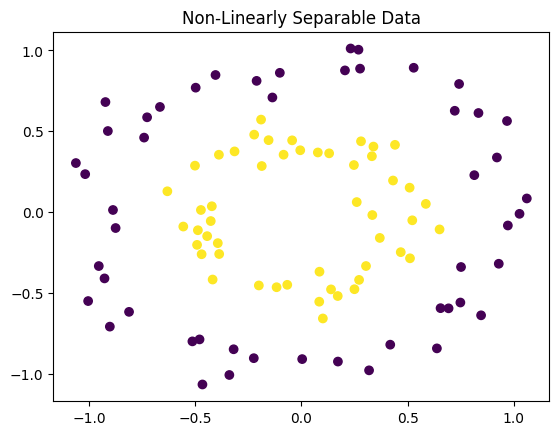

In [4]:
# rbf_svc = svm.SVC(kernel='rbf')
# rbf_svc.kernel

# svm project low-dimension data to high-dimension
# to make the data linearly separable
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA

# Generate some non-linearly separable data
X, y = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=1)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Non-Linearly Separable Data")
plt.show()




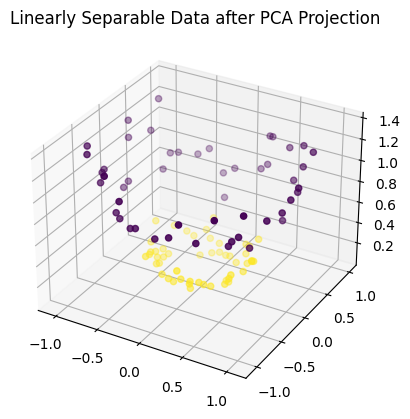

In [6]:
# for each example, add a third dimension by squaring x1 and x2
x3 = np.reshape(X[:, 0]**2 + X[:, 1]**2, (100, 1))
           
X = np.hstack((X, x3))

# Visualize the data after projection
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.set_title("Linearly Separable Data after PCA Projection")
plt.show()


* [Different typs of feature transformation and their corresponding kernel functions](https://www.youtube.com/watch?v=Q7vT0--5VII)
* Kernel functions to systematically find SVC in higher dimension
    - linear: $\left\langle x, x^{\prime}\right\rangle$.
    - polynomial: $\left(\gamma\left\langle x, x^{\prime}\right\rangle+r\right)^d$, where $d$ is specified by parameter degree, $r$ by coefo.
    - radial basis function: $\exp \left(-\gamma\left\|x-x^{\prime}\right\|^2\right)$, where $\gamma$ is specified by parameter gamma, must be greater than 0 .
    - sigmoid $\tanh \left(\gamma\left\langle x, x^{\prime}\right\rangle+r\right)$, where $r$ is specified by coefo.
* The kernel tricks actualy never explicitly map your data into the RKHS


It turns out that the plane in the 3-D space is the circle in the 2-D space.

## Multiclass Classification - One vs. One; One vs. Rest
* one-versus-one: n_classes * (n_classes - 1) / 2 classifiers according to the combination formula
* one-vs-rest: n_classes classifiers

In [13]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(decision_function_shape='ovo') # one vs one
clf.fit(X, Y)

dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes: 4*3/2 = 6

6

In [19]:
clf.dual_coef_.shape  # (n_classes-1, n_SV)
clf.intercept_.shape # (n_classes * (n_classes - 1) / 2)

# each row now corresponding to a binary classifier. The order for classes 0 to n is 
# “0 vs 1”, “0 vs 2” , … “0 vs n”, “1 vs 2”, “1 vs 3”, “1 vs n”, . . . “n-1 vs n”

(6,)

In [7]:
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes

4

 LinearSVC implements “one-vs-the-rest” multi-class strategy, thus training n_classes models

In [10]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X, Y)

dec = lin_clf.decision_function([[1]])
dec.shape[1]


4

In [11]:

lin_clf.coef_.shape  # (n_classes, n_features) 
lin_clf.intercept_.shape # (n_classes,)

# Each row of the coefficients corresponds to one of the n_classes “one-vs-rest” classifiers

(4, 1)